# 🤦프로젝트: 인물 모드 문제점 찾기🤦‍♀️

## Step 1. 인물모드 직접 해 보기

In [1]:
# ❗️필요한 모듈 import
# os: 파이썬에서 운영체제 기능 사용 (예: 경로 이동, 환경 변수 등)
# urllib: URL 처리용 모듈 모음 (예: 요청, 파싱 등)
# cv2: OpenCV 라이브러리, 컴퓨터 비전용 도구
# numpy: 다차원 배열 및 수치 계산 라이브러리
# pixellib: 이미지·영상 분할(segmentation) 라이브러리
# pixellib.semantic: semantic segmentation을 쉽게 구현
# matplotlib: 데이터 시각화용 플로팅 라이브러리

import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

print('완료')

완료


Image 1 shape: (2703, 2703, 3)
Image 2 shape: (768, 1024, 3)
Image 3 shape: (720, 1280, 3)


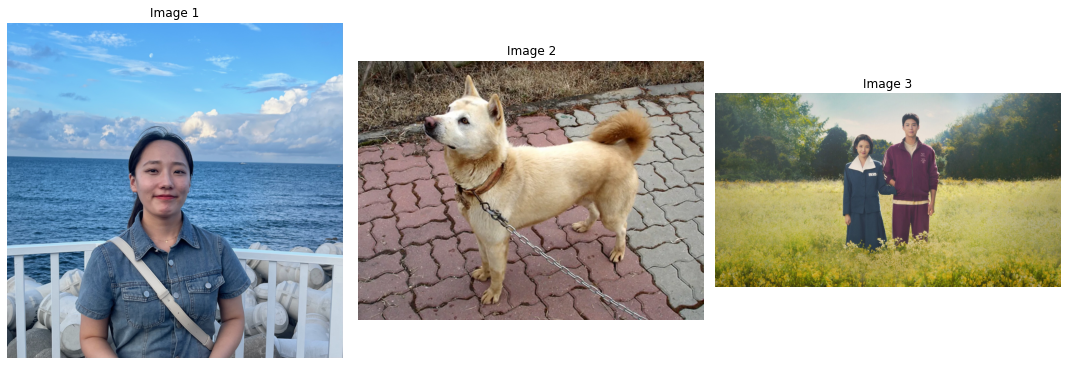

In [2]:
import os
import cv2
import matplotlib.pyplot as plt

# 이미지 파일 이름들
img_names = ['IMG_1574.jpeg', 'jindo.webp', 'another.jpg']

# 전체 이미지 경로
img_paths = [os.path.join(os.getenv('HOME'), 'aiffel/human_segmentation/images', name) for name in img_names]

# 이미지 불러오기, 변환, 출력
plt.figure(figsize=(15, 5))

for i, path in enumerate(img_paths):
    # 1. 이미지 불러오기
    img = cv2.imread(path)
    print(f"Image {i+1} shape: {img.shape}")

    # 2. BGR → RGB 변환
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 3. 시각화
    plt.subplot(1, len(img_paths), i+1)
    plt.imshow(img_rgb)
    plt.title(f'Image {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [3]:
# 모델 저장 경로 설정
model_dir = os.getenv('HOME') + '/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib 모델 URL
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 모델 다운로드 및 저장
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7c8d57dbe580>)

In [4]:
# semantic segmentation 모델 인스턴스 생성
model = semantic_segmentation()

# 사전 학습된 PASCAL VOC 모델 로드
model.load_pascalvoc_model(model_file)

In [5]:
# segmentAsPascalvoc() 함수 설명:
# 1. 주어진 이미지 경로(img_path)에서 이미지를 불러옴
# 2. Pascal VOC 데이터셋으로 학습된 DeepLabV3+ 모델로 semantic segmentation 수행
# 3. 두 가지 결과 반환:
#    - segvalues: 각 픽셀의 클래스 번호가 담긴 배열 (numpy array)
#    - output: 클래스별 색상이 입혀진 분할 이미지 (시각화용)
img_names = ['IMG_1574.jpeg', 'jindo.webp', 'another.jpg']
img_paths = [os.path.join(os.getenv('HOME'), 'aiffel/human_segmentation/images', name) for name in img_names]

# 3. segmentation만 수행
seg_results = []

for path in img_paths:
    segvalues, output = model.segmentAsPascalvoc(path)
    seg_results.append((segvalues, output))  # 결과 저장

print("segmentation 완료! 총", len(seg_results), "장의 결과가 저장되었습니다.")

segmentation 완료! 총 3 장의 결과가 저장되었습니다.


In [6]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

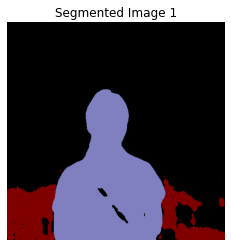

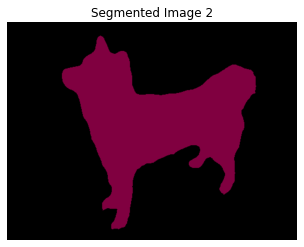

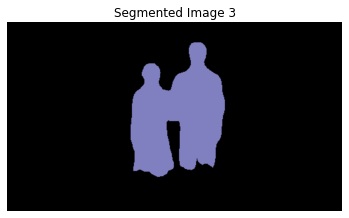

In [7]:
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
import matplotlib.pyplot as plt

for i, (segvalues, output) in enumerate(seg_results):
    plt.figure(figsize=(6, 4))
    plt.imshow(output)
    plt.title(f"Segmented Image {i+1}")
    plt.axis('off')
    plt.show()

In [8]:
segvalues # segmentAsPascalvoc() 함수를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [9]:
# segvalues에 있는 class_ids를 담겨있는 값을 통해 pascalvoc에 담겨있는 라벨을 출력
for i, (segvalues, _) in enumerate(seg_results):
    print(f" Image {i+1} contains:")

    class_ids = segvalues['class_ids']  # ← 실제로 이렇게 돼 있을 경우를 반영
    for class_id in class_ids:
        print(LABEL_NAMES[class_id])

    print("-" * 50)

 Image 1 contains:
background
boat
person
--------------------------------------------------
 Image 2 contains:
background
dog
--------------------------------------------------
 Image 3 contains:
background
person
--------------------------------------------------


In [10]:
# 컬러맵 만들기 (Pascal VOC 클래스 256개에 대한 RGB 색상 지정)
colormap = np.zeros((256, 3), dtype=int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]  # 생성된 상위 20개의 클래스 컬러 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [11]:
# colormap[15] → PascalVOC에서 'person' 클래스에 해당하는 RGB 색상
print(colormap[15])  # 예: array([192, 128, 128])

# RGB → BGR로 순서 변경하여 output과 비교 가능하게 만듦
seg_color = tuple(colormap[15][::-1])  # (128, 128, 192)

# colormap[12] → 'dog' 클래스의 RGB 색상
print(colormap[12])  # 예: array([ 64,   0, 128])

# RGB → BGR 변환
print(colormap[12][::-1])  # 결과: array([128, 0, 64])
seg_color = tuple(colormap[12][::-1])  # (128, 0, 64)

[192 128 128]
[ 64   0 128]
[128   0  64]


(2703, 2703)


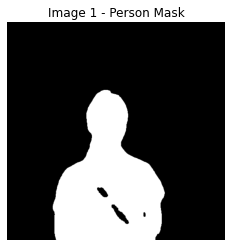

(768, 1024)


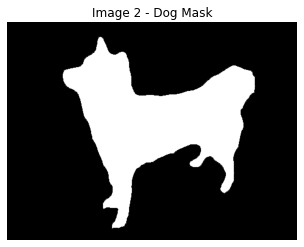

(720, 1280)


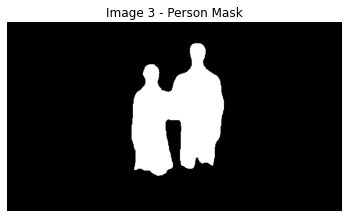

In [13]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함

for i, (_, output) in enumerate(seg_results):
    # 이미지에 따라 클래스 ID 다르게 설정
    if i == 1:
        seg_color = tuple(colormap[12][::-1])  # dog
        label = 'Dog'
    else:
        seg_color = tuple(colormap[15][::-1])  # person
        label = 'Person'

    seg_map = np.all(output == seg_color, axis=-1)

    if np.any(seg_map):  # 해당 클래스가 존재할 경우에만 시각화
        print(seg_map.shape)
        plt.imshow(seg_map, cmap='gray')
        plt.title(f"Image {i+1} - {label} Mask")
        plt.axis('off')
        plt.show()
    else:
        print(f"Image {i+1} - {label.lower()}(class_id={15 if label=='Person' else 12}) 없음. 건너뜀.")

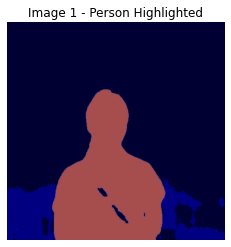

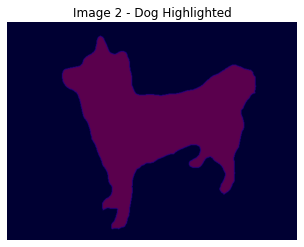

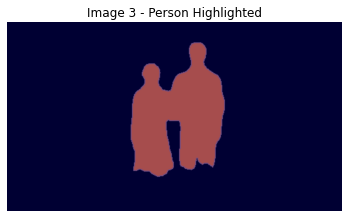

In [12]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person 또는 dog에 해당하므로, 해당 객체 위치만 남기고 나머지는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함

for i, (_, output) in enumerate(seg_results):
    img_show = output.copy()  # segmentation 결과 이미지 복사

    # 이미지에 따라 대상 클래스 변경
    if i == 1:  # 두 번째 이미지: dog
        seg_color = tuple(colormap[12][::-1])  # RGB → BGR
        label = 'Dog'
    else:  # 나머지: person
        seg_color = tuple(colormap[15][::-1])  # RGB → BGR
        label = 'Person'

    # True과 False인 값을 각각 255과 0으로 바꿔줍니다
    seg_map = np.all(output == seg_color, axis=-1)
    img_mask = seg_map.astype(np.uint8) * 255

    # 255와 0을 적당한 색상으로 바꿔봅니다
    color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

    # segmentation된 output 이미지와 마스크를 적당히 합쳐봅니다
    img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

    # 결과 출력
    plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
    plt.title(f"Image {i+1} - {label} Highlighted")
    plt.axis('off')
    plt.show()

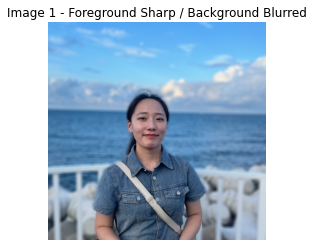

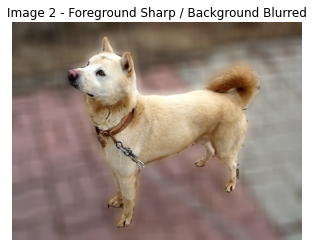

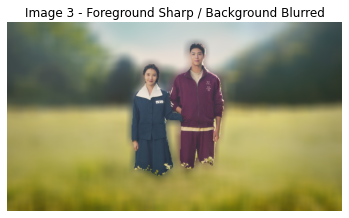

In [19]:
# person / dog original, backgrond blurred
for i, (segvalues, output) in enumerate(seg_results):
    img_orig = cv2.imread(img_paths[i])
    img_blur = cv2.blur(img_orig, (45,45))

    # 이미지에 따라 타겟 클래스 선택
    if i == 1:
        seg_color = tuple(colormap[12][::-1])  # dog
    else:
        seg_color = tuple(colormap[15][::-1])  # person

    # 마스크 생성
    seg_map = np.all(output == seg_color, axis=-1)
    seg_mask = seg_map.astype(np.uint8)

    # 마스크를 3채널로 확장 (for blending)
    seg_mask_3ch = np.stack([seg_mask]*3, axis=-1)

    # 마스크가 1인 부분은 원본, 0인 부분은 블러 배경
    result = np.where(seg_mask_3ch == 1, img_orig, img_blur)

    # 시각화
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title(f"Image {i+1} - Foreground Sharp / Background Blurred")
    plt.axis('off')
    plt.show()

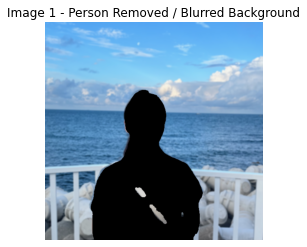

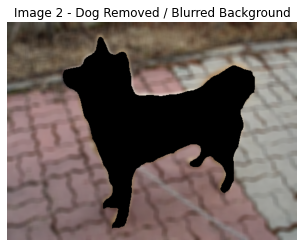

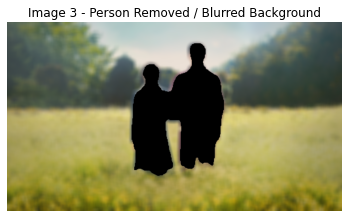

In [16]:
for i, (_, output) in enumerate(seg_results):
    # 1. 원본 이미지와 블러 이미지 준비
    img_orig = cv2.imread(img_paths[i])
    img_orig_blur = cv2.blur(img_orig, (20, 20))  # 전체 blur 처리된 이미지

    # 2. 이미지에 따라 대상 클래스 선택
    if i == 1:
        seg_color = tuple(colormap[12][::-1])  # dog
        label = 'Dog'
    else:
        seg_color = tuple(colormap[15][::-1])  # person
        label = 'Person'

    # 3. seg_color와 일치하는 픽셀만 True로 만드는 마스크 생성
    seg_map = np.all(output == seg_color, axis=-1)
    img_mask = seg_map.astype(np.uint8) * 255  # 0과 255로 구성된 마스크

    # 4. bitwise 연산을 위해 1채널 → 3채널로 변환
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

    # 5. 마스크 반전 → 사람/강아지 제외한 배경만 남기기
    img_bg_mask = cv2.bitwise_not(img_mask_color)

    # 6. blur 이미지에서 배경만 추출
    img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)

    # 7. 결과 시각화
    plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
    plt.title(f"Image {i+1} - {label} Removed / Blurred Background")
    plt.axis('off')
    plt.show()

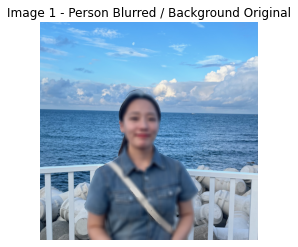

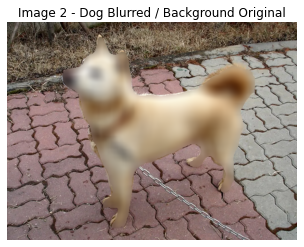

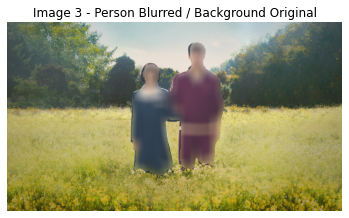

In [18]:
# person / dog blurred, backgrond original

for i, (_, output) in enumerate(seg_results):
    # 1. 원본 이미지와 블러 이미지 준비
    img_orig = cv2.imread(img_paths[i])
    img_orig_blur = cv2.blur(img_orig, (45, 45))  # 전체 blur 이미지, blur의 강도를 올림

    # 2. 이미지에 따라 대상 클래스 설정
    if i == 1:
        seg_color = tuple(colormap[12][::-1])  # dog
        label = 'Dog'
    else:
        seg_color = tuple(colormap[15][::-1])  # person
        label = 'Person'

    # 3. 세그멘테이션 마스크 생성 (대상 클래스 영역)
    seg_map = np.all(output == seg_color, axis=-1)
    img_mask = seg_map.astype(np.uint8) * 255

    # 4. 1채널 → 3채널 변환
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

    # 5. 전경만 블러로 덮고, 배경은 원본 유지
    img_concat = np.where(img_mask_color == 255, img_orig_blur, img_orig)

    # 6. 시각화
    plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
    plt.title(f"Image {i+1} - {label} Blurred / Background Original")
    plt.axis('off')
    plt.show()

**이번에는 배경을 완전히 다른 걸로 바꿔보자 !!**<br>
단, ❌ PixelLib의 change_bg_img()는 기존 segmentation 결과를 활용할 수 없음! <br>
✅ 무조건 이미지 경로를 다시 받아서 내부에서 segmentation을 새로 수행하기에 처음부터 다시 정의해줘야 함.

/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48176 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50756 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47308 missing from current font.
  font.set_

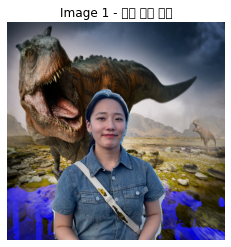

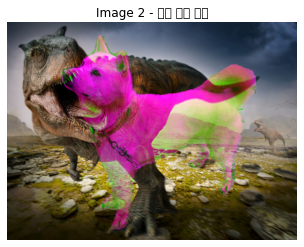

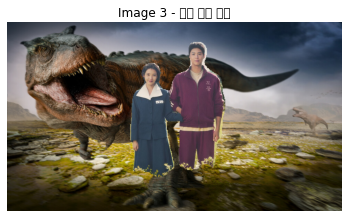

In [22]:
# 필요한 라이브러리 임포트
from pixellib.tune_bg import alter_bg
import cv2
import matplotlib.pyplot as plt
import os

# 1. PixelLib 객체 생성 및 모델 로드
segment_image = alter_bg(model_type="deeplabv3_xception")
model_file = os.path.join(os.getenv('HOME'), 'aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
segment_image.load_pascalvoc_model(model_file)

# 2. 새로운 배경 이미지 경로
new_bg_path = os.path.join(os.getenv('HOME'), 'aiffel/human_segmentation/images/20241226503499.jpg')

# 3. 이미지 파일 이름들
img_names = ['IMG_1574.jpeg', 'jindo.webp', 'another.jpg']
img_paths = [os.path.join(os.getenv('HOME'), 'aiffel/human_segmentation/images', name) for name in img_names]

# 4. 3장 반복 처리하며 배경 교체
for i, img_path in enumerate(img_paths):
    result_path = f"temp_result_{i+1}.png"

    # 배경 교체 수행 → PixelLib
    segment_image.change_bg_img(
        f_image_path=img_path,
        b_image_path=new_bg_path,
        output_image_name=result_path
    )

    # 결과 이미지 불러와 시각화
    img_result = cv2.imread(result_path)
    plt.imshow(cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Image {i+1} - 배경 교체 완료")
    plt.show()

## Step 2. 사진에서 문제점 찾기

문제점 : segmentation을 잘 못함 특히 첫 번째 사진에서 (난간, 가방끈, 정수리 등을 깔끔하게 구분하지 못함) <br>
배경을 바꾼 사진은 매우 부자연스러우며 경계가 불명확하고 강아지 위에 핑크+녹색의 세그멘테이션 마스크 잔존함..<br>
다른 모델을 써보쟈 !!

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1744691176.485406     247 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48176 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240:

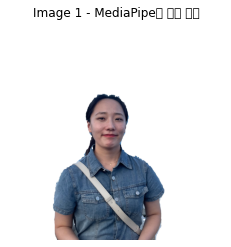

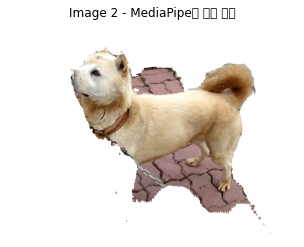

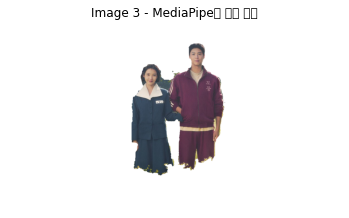

In [24]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
import os

# 이미지 파일 리스트
img_names = ['IMG_1574.jpeg', 'jindo.webp', 'another.jpg']
img_paths = [os.path.join(os.getenv('HOME'), 'aiffel/human_segmentation/images', name) for name in img_names]

# MediaPipe 모델 로드 
mp_selfie_segmentation = mp.solutions.selfie_segmentation
selfie_segmentation = mp_selfie_segmentation.SelfieSegmentation(model_selection=1)

# 3장 반복 처리
for i, img_path in enumerate(img_paths):
    # 이미지 불러오기
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 세그멘테이션 수행
    results = selfie_segmentation.process(img_rgb)

    # 마스크 생성
    mask = results.segmentation_mask
    condition = mask > 0.6  # 마스크 임계값 조절 가능

    # 배경 이미지 (흰색)
    bg_image = np.ones(img.shape, dtype=np.uint8) * 255

    # 마스크 기반 합성
    output_image = np.where(condition[..., None], img, bg_image)

    # 시각화
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Image {i+1} - MediaPipe로 배경 제거")
    plt.show()

내 강아지..ㅠㅠ <br>
**MediaPipe Selfie Segmentation은:<br>
	•	사람 셀피 사진에 최적화됨<br>
	•	즉, 얼굴, 팔, 상체 등 사람의 특징적인 윤곽만 분리 가능<br>
	•	동물, 사물, 배경 등은 대상 아님**<br>

/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48660 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 52376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 48660 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_te

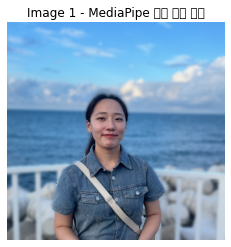

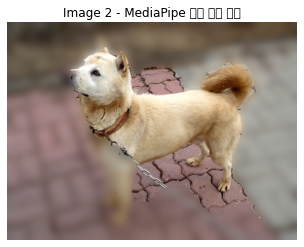

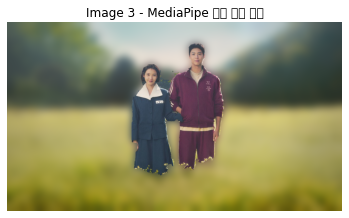

In [25]:
for i, img_path in enumerate(img_paths):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 세그멘테이션 수행
    results = selfie_segmentation.process(img_rgb)

    # 마스크 생성
    mask = results.segmentation_mask
    condition = mask > 0.6  # 사람 영역 (임계값 조절 가능)

    # 배경 블러 생성 (Gaussian Blur, 강도 세게)
    blurred_img = cv2.GaussianBlur(img, (99, 99), 0)

    # 사람은 원본, 배경은 블러
    output_image = np.where(condition[..., None], img, blurred_img)

    # 시각화
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Image {i+1} - MediaPipe 배경 블러 처리")
    plt.show()

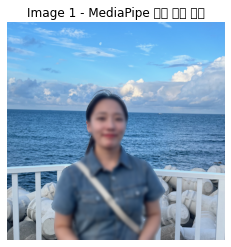

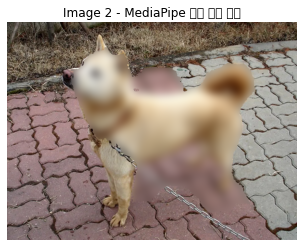

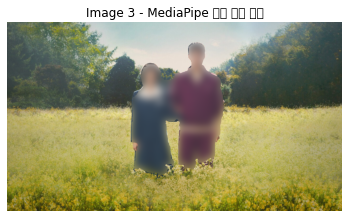

In [31]:
for i, img_path in enumerate(img_paths):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 세그멘테이션 수행
    results = selfie_segmentation.process(img_rgb)

    # 마스크 생성
    mask = results.segmentation_mask
    condition = mask > 0.6  # 사람 영역 (임계값 조절 가능)

    # 전체 블러 이미지 생성
    blurred_img = cv2.GaussianBlur(img, (99, 99), 0)

    # 사람만 블러, 배경은 원본
    output_image = np.where(condition[..., None], blurred_img, img)

    # 시각화
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Image {i+1} - MediaPipe 사람 블러 처리")
    plt.show()

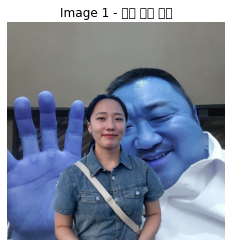

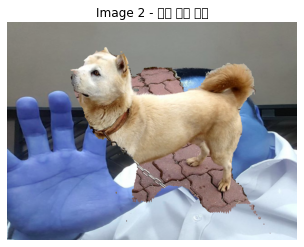

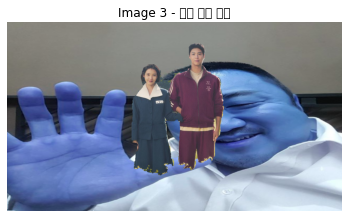

In [34]:
# 배경 이미지 로드 및 RGB 변환 (1번만 실행)
new_bg_path = os.path.join(os.getenv('HOME'), 'aiffel/human_segmentation/images/ma .png')
bg_img_original = cv2.imread(new_bg_path)
bg_img_original = cv2.cvtColor(bg_img_original, cv2.COLOR_BGR2RGB)

# 3장 반복 처리
for i, img_path in enumerate(img_paths):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 세그멘테이션 수행
    results = selfie_segmentation.process(img_rgb)

    # 마스크 생성
    mask = results.segmentation_mask
    condition = mask > 0.6  # 사람 영역

    # 배경 이미지 리사이즈 (원본 이미지와 크기 일치)
    bg_img = cv2.resize(bg_img_original, (img.shape[1], img.shape[0]))

    # 배경 교체: 사람은 원본 유지, 배경은 마블리💕💕
    output_image = np.where(condition[..., None], img, bg_img)

    # 시각화
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Image {i+1} - 배경 교체 완료")
    plt.show()

**마블리는 왜 알라딘🧞‍♂️🧞‍♂️🧞‍♂️🧞‍♂️이 되었는가....? 🤦‍♀️🤦‍♀️🤦‍(근데 맘에 듦..) <br>
강아지는 여전히 인식을 잘 못한다...이 모델에 강아지는 빼야겠다 ...
그래도 가방끈이나 난간은 지난번 모델에 비해 명확히 구분했다 !** 

W0000 00:00:1744692391.057097     251 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


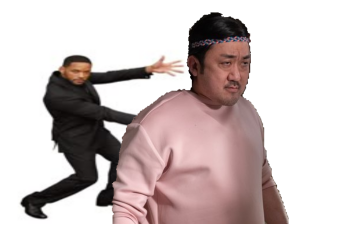

In [35]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
import os

# 1. 이미지 경로 설정
img_path = os.path.join(os.getenv('HOME'), 'aiffel/human_segmentation/images/ma2.jpg')
new_bg_path = os.path.join(os.getenv('HOME'), 'aiffel/human_segmentation/images/tada.jpg')

# 2. 이미지 불러오기
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
bg_img = cv2.imread(new_bg_path)
bg_img = cv2.cvtColor(bg_img, cv2.COLOR_BGR2RGB)

# 3. 배경 이미지 크기를 원본과 맞추기
bg_img = cv2.resize(bg_img, (img.shape[1], img.shape[0]))

# 4. MediaPipe 세그멘테이션 모델 사용
mp_selfie_segmentation = mp.solutions.selfie_segmentation
with mp_selfie_segmentation.SelfieSegmentation(model_selection=1) as selfie_segmentation:
    results = selfie_segmentation.process(img)
    mask = results.segmentation_mask
    condition = mask > 0.6  # 마스크 threshold

    # 5. 배경 교체
    output_image = np.where(condition[..., None], img, bg_img)

# 6. 결과 시각화
plt.imshow(output_image)
plt.axis('off')
plt.show()

짜잔 마블리 ~~~~~ <br>
다른 동물도 시도!!

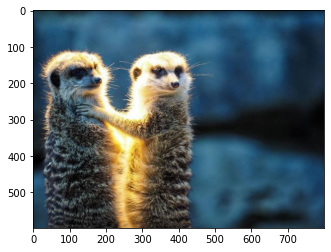

In [65]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/animal.jpg'  
img_orig = cv2.imread(img_path) 
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

W0000 00:00:1744611728.525572     137 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


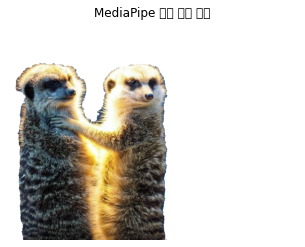

In [56]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

# 모델 로드
mp_selfie_segmentation = mp.solutions.selfie_segmentation
selfie_segmentation = mp_selfie_segmentation.SelfieSegmentation(model_selection=1)

# 이미지 불러오기
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 세그멘테이션 수행
results = selfie_segmentation.process(img_rgb)

# 마스크 생성
mask = results.segmentation_mask
condition = mask > 0.6  # 조절 가능

# 배경 만들기 (흰색 or 이미지)
bg_image = np.ones(img.shape, dtype=np.uint8) * 255

# 마스크로 합성
output_image = np.where(condition[..., None], img, bg_image)

# 시각화
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("MediaPipe 배경 제거 결과")
plt.show()

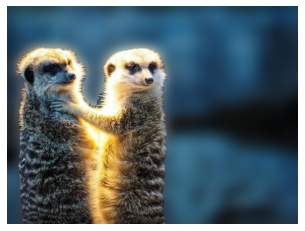

In [57]:
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 세그멘테이션 수행
results = selfie_segmentation.process(img_rgb)

# 마스크 생성
mask = results.segmentation_mask
condition = mask > 0.6  # 사람 영역

# 배경 블러 생성
blurred_img = cv2.GaussianBlur(img, (99, 99), 0)  # 블러 강도 더 진하게 !!! 

# 마스크 기반 합성: 동물은 원본, 배경은 블러
output_image = np.where(condition[..., None], img, blurred_img)

# 시각화
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

W0000 00:00:1744611775.017512     139 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


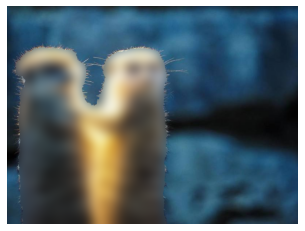

In [58]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

# 이미지 로드
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# MediaPipe 모델 로드
mp_selfie_segmentation = mp.solutions.selfie_segmentation
selfie_segmentation = mp_selfie_segmentation.SelfieSegmentation(model_selection=1)

# 세그멘테이션 수행
results = selfie_segmentation.process(img_rgb)

# 마스크 생성
mask = results.segmentation_mask
condition = mask > 0.6  # 사람 영역

# 사람 블러 처리
blurred_img = cv2.GaussianBlur(img, (99, 99), 0)

# 마스크 기반 합성: 사람은 블러, 배경은 원본
output_image = np.where(condition[..., None], blurred_img, img)

# 시각화
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

W0000 00:00:1744611981.850290     143 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


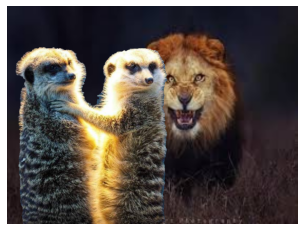

In [63]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
import os

# 1. 이미지 경로 설정
img_path = os.path.join(os.getenv('HOME'), 'aiffel/human_segmentation/images/animal.jpg')
new_bg_path = os.path.join(os.getenv('HOME'), 'aiffel/human_segmentation/images/lion.jpeg')

# 2. 이미지 불러오기
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
bg_img = cv2.imread(new_bg_path)
bg_img = cv2.cvtColor(bg_img, cv2.COLOR_BGR2RGB)

# 3. 배경 이미지 크기를 원본과 맞추기
bg_img = cv2.resize(bg_img, (img.shape[1], img.shape[0]))

# 4. MediaPipe 세그멘테이션 모델 사용
mp_selfie_segmentation = mp.solutions.selfie_segmentation
with mp_selfie_segmentation.SelfieSegmentation(model_selection=1) as selfie_segmentation:
    results = selfie_segmentation.process(img)
    mask = results.segmentation_mask
    condition = mask > 0.6  # 마스크 threshold

    # 5. 배경 교체
    output_image = np.where(condition[..., None], img, bg_img)

# 6. 결과 시각화
plt.imshow(output_image)
plt.axis('off')
plt.show()

강아지는 못하는데 미어캣(?)은 잘 인식한다...

## Step 3. 해결 방법을 제안해 보기

### 결론 : 단순히 모델을 바꾸는 것으로는 segmentation의 고질적인 문제를 해결하기 어렵다 !!

> 딥러닝 segmentation은 매우 강력한 기술이지만, 그 자체로 모든 상황을 해결할 수는 없다.  
> 최적의 결과를 위해선 **전통적 기법 + depth 정보 + 후처리 + 사전학습 API 등 다양한 조합 전략**이 필요하다.  
> 상황에 따라 가장 적합한 방법을 선택하는 것이 진짜 실전에서의 해결책이다.

## 1. 후처리(Post-processing) 기법 적용

- segmentation 마스크에 후처리를 적용하여 실사용 품질을 개선
- 팽창, 침식, 블러, 테두리 부드럽힘 등을 활용
- 노이즈 제거 및 경계 선명화에 효과적



##  2. GrabCut (OpenCV 기반 전경 추출)

- 초기 전경 위치만 대략 지정하면 통계적 모델로 전경/배경을 분리
- 딥러닝 없이도 상당히 정밀한 마스크를 생성할 수 있음
- 사전 마스크 없이도 사용 가능하지만 자동화가 필요할 수 있음



##  3. 크로마키(Chroma Key) 방식

- 배경을 초록 또는 파란색으로 고정하고 색상 차이를 기반으로 제거
- 방송, 영상 편집, 유튜브 등에서 흔히 사용됨
- 배경 조건이 제어 가능할 때 매우 강력하지만, 일반 사진에는 제한적



##  4. 3D Depth Camera 기반 분리

- 전경과 배경을 거리(깊이) 기준으로 명확하게 구분 가능
- 실루엣이나 색상에 상관없이 분리할 수 있어 딥러닝의 한계를 뛰어넘음
- 대표 장비: Intel RealSense, Azure Kinect, iPhone LiDAR, ZED Stereo
- Depth map 기반 전경 분리는 특히 머리카락, 손끝처럼 애매한 부분에 유리



## 5. rembg 및 HuggingFace 기반 배경 제거 도구

- 사전 학습된 모델을 활용한 CLI/라이브러리 형태의 배경 제거 툴
- 알파 채널이 있는 PNG 결과를 출력하며, 품질이 매우 높음
- 경량화되어 빠르며, 실무에서도 활용 가능
- 영상보다는 정적 이미지에 적합



##  6. Video Matting 기법

- 영상 전용 배경 제거 기술로, 머리카락, 투명한 베일, 경계 블렌딩 등을 정밀하게 처리
- MODNet, Robust Video Matting(RVM) 등의 최신 연구 기반
- 실시간 화상 회의, AR 필터 등에 자주 활용됨



##  7. Depth + Segmentation 융합

- 딥러닝 segmentation 마스크와 Depth map을 결합하여 정확도 향상
- MiDaS 등 monocular depth estimation 모델도 활용 가능
- 의미 기반 분할 + 거리 기반 분리를 동시에 반영



##  8. SaaS 기반 AI API 활용

- remove.bg, PhotoRoom, Canva AI 등 상용 API는 품질 보정 및 실루엣 보정까지 포함
- 클라이언트 코드 없이 간단한 업로드만으로 고품질 결과 획득
- 반복 작업이 많거나 배치 처리 시 유용



##  9. 기하 기반 기법 및 Edge 감지 조합

- Canny Edge, HOG, Haar Cascade 등 고전적인 방법을 보조적으로 활용
- 윤곽 기반 추정 → 마스크 정제 또는 초기화에 도움



##  10. Multi-step Segmentation (2단계 구조)

- Coarse segmentation → Fine segmentation 구조로 정확도 보완
- 첫 단계에서 대략 사람을 탐지한 뒤, 두 번째 단계에서 디테일을 잡아주는 방식
- 특히 복잡한 배경이나 작은 객체가 있는 경우에 효과적


### 허재은 회고

생각보다 segmentation 결과의 퀄리티가 낮아서 놀랐다.  
단순히 이미지를 편집하는 작업이라면, 오히려 포토샵처럼 사람이 직접 수정하는 방식이 더 효율적일 수도 있다는 생각이 들었다.  
하지만 실제 현실에서 딥러닝 segmentation이 쓰이는 영역은 단순한 이미지 편집이 아니라,  
실시간 영상 처리, AR 필터, 자율주행, 의료 영상 분석 등 보다 복잡하고 자동화가 필요한 분야에 가깝다.

그래서 이번 경험을 통해,  
정적인 이미지 편집보다는 실시간 이미지 segmentation 같은 동적 테스크에 더 도전해보고 싶다는 생각이 들었다.

![배경 교체 결과](background_changer.gif)